In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plotter(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,s=5)

    ax.set_xlabel('AU x-axis')
    ax.set_ylabel('AU y-axis')
    ax.set_zlabel('AU z-axis')
    
    plt.tight_layout()

In [3]:
def gravforcex(planet1, planet2):
    x1 = planet1.x
    y1 = planet1.y
    z1 = planet1.z
    x2 = planet2.x
    y2 = planet2.y
    z2 = planet2.z
    rsep = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(0.5)
    return -4*m.pi**2*(x1-x2)*planet2.mass/(rsep)**3

def gravforcey(planet1, planet2):
    x1 = planet1.x
    y1 = planet1.y
    z1 = planet1.z
    x2 = planet2.x
    y2 = planet2.y
    z2 = planet2.z
    rsep = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(0.5)
    return -4*m.pi**2*(y1-y2)*planet2.mass/(rsep)**3

def gravforcez(planet1, planet2):
    x1 = planet1.x
    y1 = planet1.y
    z1 = planet1.z
    x2 = planet2.x
    y2 = planet2.y
    z2 = planet2.z
    rsep = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(0.5)
    return -4*m.pi**2*(x1-x2)*planet2.mass/(rsep)**3

In [4]:
class makeplanet:
     
    def __init__(self, name,mass,x,y,z,vx,vy,vz):
        self.name = name
        self.x = x
        self.y = y
        self.z = z
        self.vx = 365*vx
        self.vy = 365*vy
        self.vz = 365*vz
        self.mass = mass
           
    def accx(self,x,y,z):
        r = ((x)**2+(y)**2+(z)**2)**(0.5)
        accx = -4*m.pi**2*x/(r**3)
        return accx
    
    def accy(self,x,y,z):
        r = ((x)**2+(y)**2+(z)**2)**(0.5)
        accy = -4*m.pi**2*y/(r**3)
        return accy
    
    def accz(self,x,y,z):
        r = ((x)**2+(y)**2+(z)**2)**(0.5)
        accz = -4*m.pi**2*z/(r**3)
        return accz
    
    def movex(self,xnew):
        self.x=xnew
    def movey(self,ynew):
        self.y=ynew
    def movez(self,znew):
        self.z=znew
    
    def movevx(self,vxnew):
        self.vx=vxnew
    def movevy(self,vynew):
        self.vy=vynew
    def movevz(self,vznew):
        self.vz=vznew

In [5]:
test = makeplanet("Test", 1, 1,1,1,1,1,1)
mercury = makeplanet("Mercury",1.65E-07,2.80E-01,1.73E-01,-1.18E-02,-2.01E-02,2.53E-02,3.91E-03)
venus = makeplanet("Venus", 2.45E-06, -7.02E-01, 1.36E-01, 4.24E-02, -3.81E-03, -1.99E-02, -5.40E-05)
earth = makeplanet("Earth", 3.0E-06, -9.88E-01, 8.50E-02, -1.52E-04, -1.68E-03, -1.71E-02, 4.35E-07) 
mars = makeplanet("Mars", 3.3E-07, 7.78E-01, 1.28, 7.56E-03, -1.14E-02, 8.47E-03, 4.58E-04)
jupiter = makeplanet("Jupiter", 0.00095, -5.23, -1.53, 1.23E-01,2.02E-3, -6.88E-03, -1.67E-05)
saturn = makeplanet("Saturn", 0.000275, -1.48,-9.93, 2.32E-01, 5.212E-03, -8.39E-04, -1.93E-04)
uranus = makeplanet("Uranus", 0.000044, 1.82E01, 8.08, -2.06E-01, -1.62E-03, 3.41E-03, 3.38E-05)
neptune = makeplanet("Neptune", 0.0000515, 2.84E01, -9.47, -4.60E-01,9.711E-04, 2.997E-03, -8.38E-05)
pluto = makeplanet("Pluto", 6.55E-09, 9.89, -3.18E01, 5.396E-01, 3.06E-03, 2.906E-04, -9.09E-04)

In [6]:
print(test.x)
print(test.accx(test.x,test.y, test.z))

1
-7.5976250103520755


In [7]:
#Functionality is working for changing the x coordinate
test.movex(2)
test.x

2

In [8]:
test.accx(test.x,test.y, test.z)

-5.372332165732466

In [9]:
test.accy(test.x,test.y, test.z)

-2.686166082866233

In [10]:
test.accz(test.x,test.y, test.z)

-2.686166082866233

In [11]:
test.movez(3)
test.accz(test.x,test.y, test.z)

-2.260939482359547

In [12]:
def buildaccx(planet, list_of_planets):
    accel_x = planet.accx(planet.x, planet.y, planet.z)
    for i in list_of_planets:
        if i.name!=planet.name:
            #print(i.name)
            accel_x += gravforcex(planet, i)
    return accel_x

def buildaccy(planet, list_of_planets):
    accel_y = planet.accy(planet.x, planet.y, planet.z)
    for i in list_of_planets:
        if i.name!=planet.name:
            accel_y += gravforcey(planet, i)
    return accel_y

def buildaccz(planet, list_of_planets):
    accel_z = planet.accz(planet.x, planet.y, planet.z)
    for i in list_of_planets:
        if i.name!=planet.name:
            accel_z += gravforcez(planet, i)
    return accel_z

In [13]:
earth.x

-0.988

In [14]:
earth.accx(earth.x, earth.y, earth.z)

39.99833339111919

In [15]:
planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]

In [16]:
#Just testing a function to make sure that the x acceleration makes sense
buildaccx(earth, planets)

39.99773374665994

In [17]:
buildaccy(earth,planets)

-3.4417092456222957

In [18]:
def coorx(xi, h,vxi, axi):
    return xi + h*vxi+h**2*axi/2

def velx(vxi, h, ax_i_1,ax_i):
    return vxi + (h/2)*(ax_i_1+ax_i)

def coory(yi, h,vyi, ayi):
    return yi + h*vyi+h**2*ayi/2

def vely(vyi, h, ay_i_1,ay_i):
    return vyi + (h/2)*(ay_i_1+ay_i)

def coorz(zi, h,vzi, azi):
    return zi + h*vzi+h**2*azi/2

def velz(vzi, h, az_i_1,az_i):
    return vzi + (h/2)*(az_i_1+az_i)

In [19]:
planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]
def solar_system(time):
    #The number of years we want to loop over, 10 years for this test
    h = 1/365 #The step size, defined as one day
    n = int(time/h) #The total numbers of iterations

    all_x =[]
    all_y = []
    all_z = []


    for obj in planets:
        coordinatesx = np.zeros(n+1) 
        coordinatesy = np.zeros(n+1) 
        coordinatesz = np.zeros(n+1) 
        velocitiesx = np.zeros(n+1) 
        velocitiesy = np.zeros(n+1) 
        velocitiesz = np.zeros(n+1) 

        coordinatesx[0] = obj.x
        coordinatesy[0] = obj.y
        coordinatesz[0] = obj.z

        velocitiesx[0] = obj.vx
        velocitiesy[0] = obj.vy
        velocitiesz[0] = obj.vz

        for j in range(n):
            x_j = coordinatesx[j]
            vx_j = velocitiesx[j]
            y_j = coordinatesy[j]
            vy_j = velocitiesy[j]
            z_j = coordinatesz[j]
            vz_j = velocitiesz[j]

            ax_j = buildaccx(obj, planets)
            ay_j = buildaccy(obj, planets)
            az_j = buildaccz(obj, planets)

            x_j_1 = coorx(x_j, h,vx_j,ax_j)
            y_j_1 = coory(y_j, h,vy_j,ay_j)
            z_j_1 = coorz(z_j, h,vz_j,az_j)

            coordinatesx[j+1] = x_j_1
            coordinatesy[j+1] = y_j_1
            coordinatesz[j+1] = z_j_1

            obj.movex(x_j_1)
            obj.movey(y_j_1)
            obj.movez(z_j_1)

            ax_j_1 = buildaccx(obj, planets)
            ay_j_1 = buildaccy(obj, planets)
            az_j_1 = buildaccz(obj, planets)

            vx_j_1 = velx(vx_j,h,ax_j_1,ax_j)
            vy_j_1 = vely(vy_j,h,ay_j_1,ay_j)
            vz_j_1 = velz(vz_j,h,az_j_1,az_j)

            velocitiesy[j+1] = vy_j_1
            velocitiesx[j+1] = vx_j_1
            velocitiesz[j+1] = vz_j_1

            obj.movevx(vx_j_1)
            obj.movevy(vy_j_1)  
            obj.movevz(vz_j_1)

        all_x.append(coordinatesx)
        all_y.append(coordinatesy)
        all_z.append(coordinatesz)

        print(obj.name, "is done!")
    plotter(all_x, all_y, all_z)

Mercury is done!
Venus is done!
Earth is done!
Mars is done!
Jupiter is done!
Saturn is done!
Uranus is done!
Neptune is done!
Pluto is done!


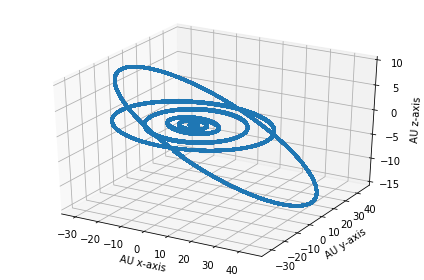

In [20]:
solar_system(250)